In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
#import splitfolders
#train_src = "asl/asl_alphabet_train/asl_alphabet_train"

#splitfolders.ratio(train_src, output="datasets/asl_alphabet",
#    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values0

In [3]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense
import os
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score ,recall_score , f1_score,precision_score


In [4]:
train_dir = 'datasets/asl_alphabet/train/'
val_dir = 'datasets/asl_alphabet/val/'
test_dir  = 'datasets/asl_alphabet/test/'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

batch_size = 32
target_size = (32,32) # dataset pic = 200x200

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen   = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen  = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 71950 images belonging to 29 classes.
Found 8881 images belonging to 29 classes.
Found 8792 images belonging to 29 classes.


In [6]:
# images_list = []
# labels_list = []

# # Iterate over the generator to collect data
# for i in range(len(test_generator)):
#     batch_images, batch_labels = test_generator[i]
#     images_list.append(batch_images)
#     labels_list.append(batch_labels)

# # Concatenate the data arrays
# images = np.concatenate(images_list)
# y_test = np.concatenate(labels_list)
# # print(images[0].shape)
# # print(y_test)

In [7]:
######################---------------------------#############

In [8]:
labels = list(train_generator.class_indices.keys())
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [9]:
def sample_images(labels):
    plt.figure(figsize=(20, 25))  # Adjusted figsize
    for i, label in enumerate(labels):
        label_path = os.path.join(train_dir, label)
        count = 0  # Counter for images of each label
        for img in os.listdir(label_path):
            if count == 8:  # Display only eight images per label
                break
            plt.subplot(10, 8, i*8 + count + 1)  # Adjusted subplot for 10 labels
            img_arr = cv2.imread(os.path.join(label_path, img))
            img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
            plt.imshow(img_arr)
            plt.axis('off')
            plt.title(label)
            count += 1  # Increment the counter
    # Title
    plt.suptitle("Sample Images in ASL Alphabet Dataset", x=0.55, y=0.92)
    plt.show()


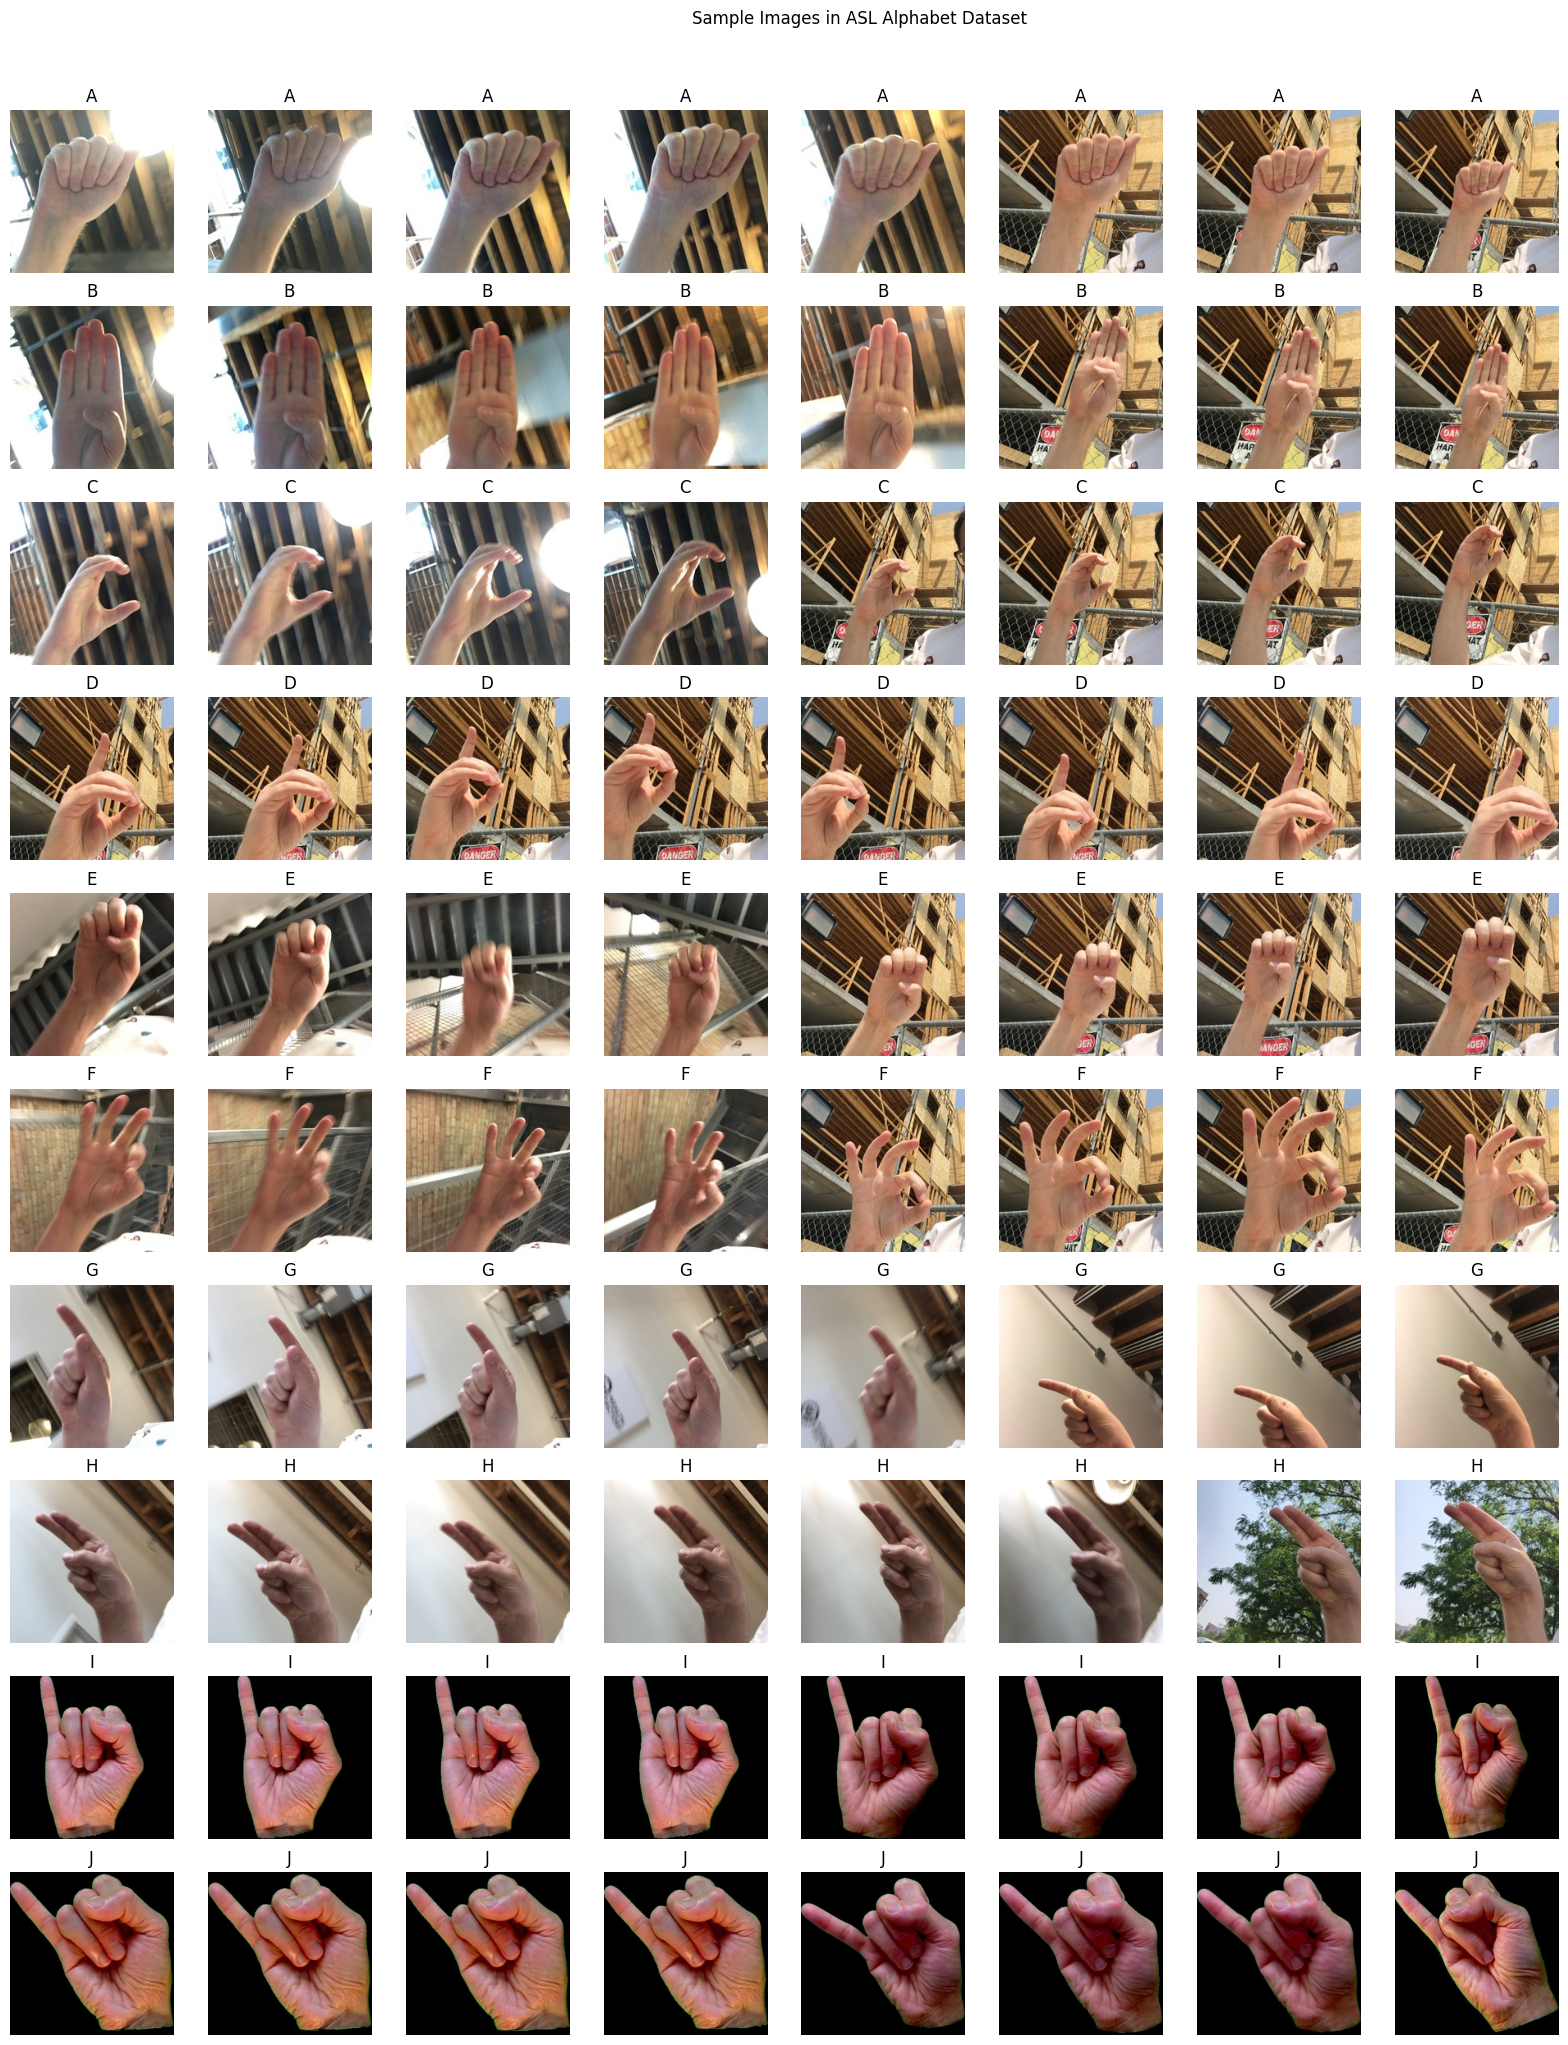

In [10]:
sample_images(labels[:10])

In [11]:
num_classes = len(labels)
input_shape = (32,32,1)

In [12]:
# # Build Model
# model = models.Sequential()
# # 1st convolution layer
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# # 2nd convolution layer
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# # 3rd convolution layer
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# # fully-connected layers
# model.add(layers.Flatten())
# model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dense(num_classes, activation='softmax'))

# model.summary()

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint path
checkpoint_path = "best_model_final.keras"

# Create ModelCheckpoint callback 
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy', #display accuracy of this model
                             verbose=1, #display the progress of trainig
                             save_best_only=True,
                             mode='max' #
                            )


In [14]:
# Compile Model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# history = model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[checkpoint])

In [16]:
# acc=history.history['accuracy']
# val_acc=history.history['val_accuracy']
# loss=history.history['loss']
# val_loss=history.history['val_loss']
# epochs=range(1,len(acc)+1)

# #train an validation accuracy
# plt.plot(epochs,acc,label='training accuracy')
# plt.plot(epochs,val_acc,label='validation accuracy')
# plt.title('training and validation accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.figure()


# #train and validation loss
# plt.plot(epochs,loss,label='training loss')
# plt.plot(epochs,val_loss,label='validation loss')
# plt.title('training and validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()

In [17]:
import tensorflow
new_model = tensorflow.keras.models.load_model('asl_alphabet_cnn_final.keras')


In [18]:
output = new_model.predict(test_generator)
pred_lbls = np.argmax(output,axis=1)
print(output.shape)

D:\Anconda\envs\Test\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


275/275 ━━━━━━━━━━━━━━━━━━━━ 43s 154ms/step
(8792, 29)


In [19]:
#macro averge => calculates each class's performance metric (e.g., precision, recall) and then takes the arithmetic mean across all classe
#precision measures the model's ability to predict class correctly.
actual_labels = test_generator.classes
accuracy = accuracy_score(actual_labels, pred_lbls) # correct prediction  / all prediction
print("Accuracy = {}".format(accuracy))

# Calculate Precision score
precision=precision_score(actual_labels,pred_lbls,average="macro") # correct prediction / all predictions of this class (t and f)
print("Precision = {}".format(precision))

recall = recall_score(actual_labels, pred_lbls, average="macro") #correct prediction / all predictions (t and f)
print("Recall = {}".format(recall))

f1 = f1_score(actual_labels, pred_lbls, average="macro")
print("F1 Score = {}".format(f1))



Accuracy = 0.9783894449499545
Precision = 0.9790249097147166
Recall = 0.9784803772202805
F1 Score = 0.9784772042691973


Length of y_test: 8792
Length of pred_lbls: 8792


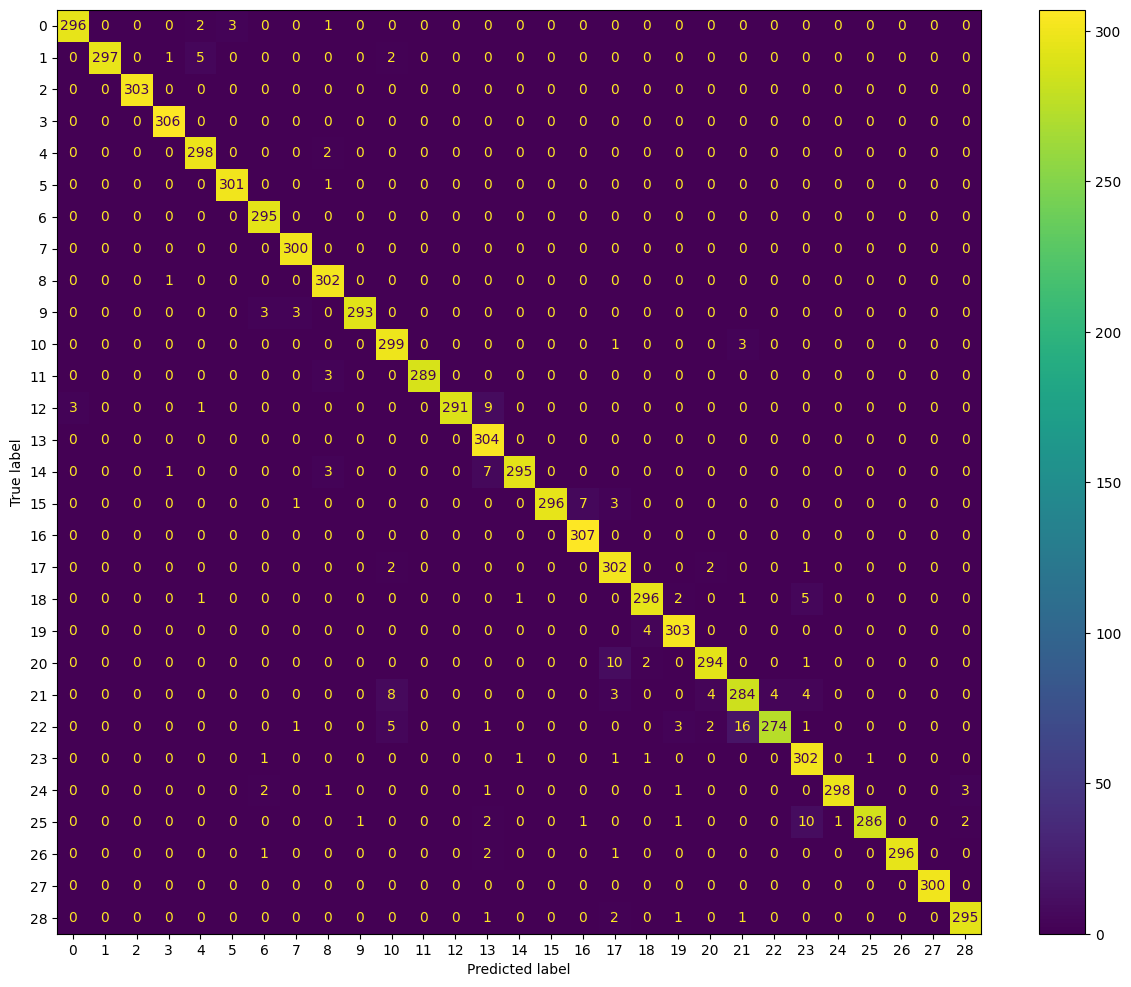

In [20]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have test_generator and pred_lbls defined earlier

# Get true labels from test_generator.classes
#true_labels = test_generator.classes

# Create the confusion matrix
#conf_matrix = confusion_matrix(true_labels, pred_lbls)
print("Length of y_test:", len(test_generator.classes))
print("Length of pred_lbls:", len(pred_lbls))

cm = confusion_matrix(test_generator.classes, pred_lbls, labels=np.unique(test_generator.classes))
# Display the confusion matrix
fig, ax = plt.subplots(figsize=(15, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_generator.classes))
disp.plot(ax=ax)
plt.show()



In [21]:
scores = new_model.evaluate(test_generator) 
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

275/275 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.9858 - loss: 0.0540
Test loss:  0.08842609077692032
Test accuracy:  0.9786169528961182


In [22]:
#model.save("asl_alphabet_cnn_final.keras")

In [23]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk

In [25]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk

# Assuming you have defined `new_model` and `code` somewhere else in your code.

def uploadImg():
    path = filedialog.askopenfilename(initialdir=r"datasets/asl_alphabet/asl_alphabet_test_real_world_+_kaggle",
                                      filetypes=[("Image Files", ".jpg;.jpeg;*.png")])
    if path:
        # Get Image Name
        img_name = os.path.basename(path)
        # Display the uploaded image and get predicted label
        displayImage(path)
        getPredictedLabel(path, img_name[0])


def displayImage(path):
    img = Image.open(path)

    resized_image = img.resize((200,200))
    img = ImageTk.PhotoImage(resized_image)
    image_label.config(image=img ,  width=200, height=200)
    image_label.image = img


def getPredictedLabel(path, actual_label):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, target_size)
    img_reshaped = img_resized.reshape(1, *target_size, 1)  # Assuming input shape is (batch_size, height, width, channels)
    img_preprocessed = img_reshaped / 255.0  # Normalize pixel values to [0, 1] range
    
    prediction = new_model.predict(img_preprocessed)
    pred_Index = np.argmax(prediction)
    # Convert actual label index to label
    predicted_label = labels[pred_Index]
    print("Predicted label:", predicted_label)
    print("Actual label:", actual_label)
    predictedLabel.config(text=f"{predicted_label}")
    trueLabel.config(text=f"{actual_label}")

def configureGrid(obj, rows, cols):
    for i in range(rows):
        obj.rowconfigure(i, weight=1)
    for j in range(cols):
        obj.columnconfigure(j, weight=1)

window = Tk()
window.geometry("1000x700")
# Creating Window Grid
configureGrid(window, 1, 2)

# Creating Frames
leftFrame = Frame(window, width=500)
rightFrame = Frame(window, width=500)

# Create Frames Grid
configureGrid(leftFrame, 2, 1)
configureGrid(rightFrame, 2, 1)

# Packing Frames
leftFrame.grid(row=0, column=0, sticky='nsew')
rightFrame.grid(row=0, column=1, sticky='nsew')

# Left Frame Features
image_label = Label(leftFrame, image = '',width=35, height=20 , border=1 , borderwidth=1 ,bg='gray')
browseBtn = Button(leftFrame, width=35, height=2, text='Upload', fg='white', bg='gray', command=uploadImg)
# Packing Features
image_label.grid(row=0, column=0)
browseBtn.grid(row=1, column=0)

# Right Frame Features
predictHeader = Label(rightFrame, text="Predicted Output", font=("Helvetica", 30))
predictedLabel = Label(rightFrame, text="none", font=("Helvetica", 20))
trueHeader = Label(rightFrame, text="Actual Output", font=("Helvetica", 30))
trueLabel = Label(rightFrame, text="none", font=("Helvetica", 20))

#Packing Features
predictHeader.grid(row=0, column=0, sticky='n', pady=(20, 0))
predictedLabel.grid(row=0, column=0, sticky='s', pady=(0, 200))
trueHeader.grid(row=1, column=0, sticky='n', pady=(20, 0))
trueLabel.grid(row=1, column=0, sticky='s', pady=(0, 200))
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Predicted label: I
Actual label: I
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted label: A
Actual label: A
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted label: G
Actual label: h
